In [155]:
## Importing necessary liabraries
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from termcolor import colored

In [118]:
#df=pd.read_excel('customer_retention_dataset.xlsx',sheet_name='codedsheet')
df=pd.read_excel('customer_retention_dataset.xlsx')
df1=df
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268
1Gender of respondent,Male,Female,Female,Male,Female,Female,Male,Male,Female,Female,Male,Female,Female,Female,Female,Female,Male,Male,Female,Female,Female,Male,Male,Female,Female,Female,Male,Male,Female,Female,Female,Male,Male,Female,Female,Female,Male,Male,Female,Female,Female,Male,Male,Female,Female,Female,Male,Male,Female,Female,Female,Male,Male,Female,Female,Female,Male,Male,Female,Female,Female,Male,Male,Female,Female,Female,Male,Male,Female,Female,Female,Male,Male,Female,Female,Female,Male,Male,Female,Female,Female,Male,Male,Female,Female,Female,Male,Male,Male,Male,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Female,Female,Male,Female,Male,Male,Female,Female,Male,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Female,Female,Female,Female,Female,Female,Male,Male,Male,Female,Female,Female,Female,Female,Female,Male,Male,Male,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Female,Female,Female,Female,Female,Female,Female,Female,Male,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Female,Male,Male,Female,Male,Female,Female,Female,Female,Female,Female,Female,Male,Female,Female,Female,Female,Female
2 How old are you?,31-40 years,21-30 years,21-30 years,21-30 years,21-30 years,31-40 years,41-50 yaers,41-50 yaers,Less than 20 years,31-40 years,31-40 years,41-50 yaers,51 years and above,31-40 years,21-30 years,21-30 years,31-40 years,41-50 yaers,41-50 yaers,21-30 years,21-30 years,31-40 years,41-50 yaers,41-50 yaers,21-30 years,21-30 years,21-30 years,31-40 years,41-50 yaers,41-50 yaers,Less than 20 years,31-40 years,31-40 years,41-50 yaers,51 years and above,21-30 years,31-40 years,41-50 yaers,41-50 yaers,21-30 years,21-30 years,31-40 years,21-30 years,21-30 years,31-40 years,41-50 yaers,41-50 yaers,Less than 20 years,31-40 years,31-40 years,41-50 yaers,51 years and above,41-50 yaers,41-50 yaers,21-30 years,21-30 years,21-30 years,21-30 years,31-40 years,41-50 yaers,41-50 yaers,Less than 20 years,31-40 years,31-40 years,41-50 yaers,51 years and above,31-40 years,41-50 yaers,41-50 yaers,21-30 years,21-30 years,31-40 years,21-30 years,21-30 years,31-40 years,41-50 yaers,41-50 yaers,Less than 20 years,31-40 years,31-40 years,41-50 yaers,51 years and above,41-50 yaers,41-50 yaers,21-30 years,21-30 years,31-40 years,41-50 yaers,21-30 years,21-30 years,31-40 years,21-30 years,21-30 years,21-30 years,21-30 years,21-30 years,31-40 years,Less than 20 years,31-40 years,41-50 yaers,51 years

In [119]:
## Checking the dimensions of the dataset
df.shape

(269, 71)

- Dataset has 269 observations and 70 features.
- All features store catagorical data.
- 'Which of the Indian online retailer would you recommend to a friend?' is our target variable and stores catagorical data.

In [120]:
## Checking for null values
df.isnull().sum().sum()

0

- Datset doesnot have any null/missing values

In [121]:
## Checking for columns which stores object type data
print(colored('columns with object data: ',attrs=['bold','underline'],color='blue'))
print(len(df.select_dtypes(include='object').columns))

columns with object data: 
70


- 70 columns store object type data

In [122]:
print(colored('columns with object data: ',attrs=['bold','underline'],color='blue'))
print(df.select_dtypes(include=['int64','float64','int32']).columns)

columns with object data: 
Index(['4 What is the Pin Code of where you shop online from?'], dtype='object')


- Only one column stores numeric data.

In [123]:
## Replacing the names of all websites with their respective initials for ease of graph plotting and analysis
df.replace(['Amazon.in','Amazon.in, Flipkart.com','Flipkart.com','Amazon.in, Myntra.com','Amazon.in, Paytm.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com','Amazon.in, Paytm.com','Flipkart.com, Paytm.com, Myntra.com, snapdeal.com','Paytm.com','Myntra.com','Amazon.in, Flipkart.com, Snapdeal.com','Snapdeal.com','Flipkart.com, Paytm.com','Flipkart.com, Paytm.com, Snapdeal.com'],
        ['A','A,F','F','A,M','A,P,M','A,F,M','A,P','F,P,M,S','P','M','A,F,S','S','F,P','F,P,S'],inplace=True)

In [124]:
df.replace(['Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com','Flipkart.com, Myntra.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com','Amazon.in, Flipkart.com, Paytm.com','Flipkart.com, Snapdeal.com'],
          ['A,F,P,M,S','F,M','A,F,M,S','A,F,P,S','A,F,P','F,S'],inplace=True)

In [125]:
df.replace(['Myntra.com, Snapdeal.com','Amazon.in, Myntra.com, Snapdeal.com','Amazon.in, Flipkart.com, Myntra.com, Snapdeal','Amazon.in, Snapdeal','Patym.com','Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com','Flipkart.com, Myntra.com, Snapdeal.com','Amazon.in, Patym.com','Patym.com, Myntra.com'],
          ['M,S','A,M,S','A,F,M,S','A,S','P','A,F,P,M,S','F,M,S','A,P','P,M'],inplace=True)

In [126]:
df.replace(['Amazon.com','Amazon.com, Flipkart.com, Paytm.com','Amazon.com, Flipkart.com','Amazon.com, Flipkart.com, Myntra.com','Amazon.com, Paytm.com, Myntra.com','Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal','Flipkart.com, Myntra.com, Snapdeal','Paytm.com, snapdeal.com','snapdeal.com'],
           ['A','A,F,P','A,F','A,F,M','A,P,M','A,F,P,M,S','F,M,S','P,S','S'],inplace=True)

In [127]:
## Loading the encoded dataset
df2=pd.read_excel('customer_retention_dataset.xlsx',sheet_name='codedsheet')
df2.head(3).T

,0,1,2
1Gender of respondent,0,1,1
2 How old are you?,3,2,2
3 Which city do you shop online from?,Delhi,Delhi,Greater Noida
4 What is the Pin Code of where you shop online from?,110009,110030,201308
5 Since How Long You are Shopping Online ?,5,5,4
6 How many times you have made an online purchase in the past 1 year?,4,5,5
7 How do you access the internet while shopping on-line?,4,2,3
8 Which device do you use to access the online shopping?,3,1,1
9 What is the screen size of your mobile device?\t\t\t\t\t\t,5,2,4
10 What is the operating system (OS) of your device?\t\t\t\t,1,3,2


In [128]:
df2.rename(columns={'16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ':'16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   '},inplace=True)

In [129]:
## Checking for columns which stores object type data
print(colored('columns in df2 with object data: ',attrs=['bold','underline'],color='blue'))
print(len(df2.select_dtypes(include='object').columns))

columns in df2 with object data: 
25


In [130]:
print(colored('columns in df2 with object data: ',attrs=['bold','underline'],color='blue'))
print(len(df2.select_dtypes(include=['int64','float64','int32']).columns))

columns in df2 with object data: 
46


In [131]:
## Applying label encoder to df2 to convert object data into numeric data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


for i in df2.columns:
    if df2[i].dtype=='O':
        df2[i]=le.fit_transform(df2[i])

In [132]:
print(df2.select_dtypes(include='object').columns)

Index([], dtype='object')


- We have successfully encoded all the object type data

In [133]:
## Seperating Features and Target variable
X=df2.drop('Which of the Indian online retailer would you recommend to a friend?',axis=1)
y=df2['Which of the Indian online retailer would you recommend to a friend?']

**Feature selection using SelectKBest and chi2 scoring**

- We will select top 30 features based on chi2 scoring for our analysis

In [134]:
## Importing SelectKBest and chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [135]:
## Fitting SelectKBest to features and target
selectbest=SelectKBest(score_func=chi2,k=35)
selectbest.fit(X,y)

SelectKBest(k=35, score_func=<function chi2 at 0x000001F5B515F820>)

In [136]:
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(X.columns)

In [137]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores.nlargest(35,'Scores') ## Sorting in descending order

,Features,Scores
3,4 What is the Pin Code of where you shop onlin...,2.982653e+06
49,Visual appealing web-page layout,4.882118e+02
51,"Complete, relevant description information of ...",4.526376e+02
61,"Longer time to get logged in (promotion, sales...",4.340039e+02
62,Longer time in displaying graphics and photos ...,4.331758e+02
57,Privacy of customers’ information,4.018047e+02
60,Presence of online assistance through multi-ch...,3.874450e+02
50,Wild variety of product on offer,3.808478e+02
65,Limited mode of payment on most products (prom...,3.728849e+02
53,Reliability of the website or application,3.489945e+02


- Above are our top features which strongly affect the target variable

In [138]:
## Keeping only top 25 features in 'df'
best_feat=feature_scores.nlargest(35,'Scores')
df=df[list(best_feat.Features[:])]

In [139]:
df.head().T

,0,1,2,3,4
4 What is the Pin Code of where you shop online from?,110009,110030,201308,132001,530068
Visual appealing web-page layout,F,"A,M","A,P,M","A,F,P,M,S",M
"Complete, relevant description information of products",S,"A,F,M","A,P,M","A,F","A,F,P,M,S"
"Longer time to get logged in (promotion, sales period)",A,"A,F",M,S,"F,P"
"Longer time in displaying graphics and photos (promotion, sales period)",A,M,M,"M,S",P
Privacy of customers’ information,A,M,A,"A,F,M","A,P"
Presence of online assistance through multi-channel,P,"A,F,M",M,"A,F,M,S","A,M"
Wild variety of product on offer,F,"F,M","A,M","A,F",M
"Limited mode of payment on most products (promotion, sales period)",A,S,A,P,S
Reliability of the website or application,P,M,"A,P,M","A,F,P","A,P,M"


<font color='teal'>

# Exploratory Data Analysis

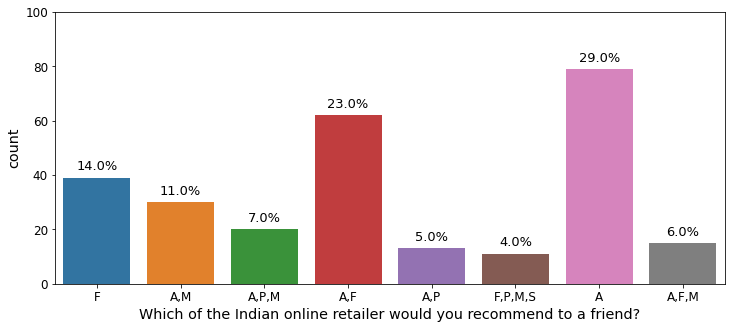

In [31]:
## Checking the classes and their frequency in the target variable

plt.figure(figsize=(12,5))
plt.ylim(0,100)
plt.rcParams.update({'axes.labelsize':'large'})
plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Which of the Indian online retailer would you recommend to a friend?'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

- Amazon is preffered by 29% customers while 23% customers use or recommend either Amazon or Flipkart.
- 14% customers are loyal to Flipkart.
- In total Amazon and Flipkart dominate the online shopping market and other sites such as Paytm, Snapdeal, Myntra subtancially lag behind them.

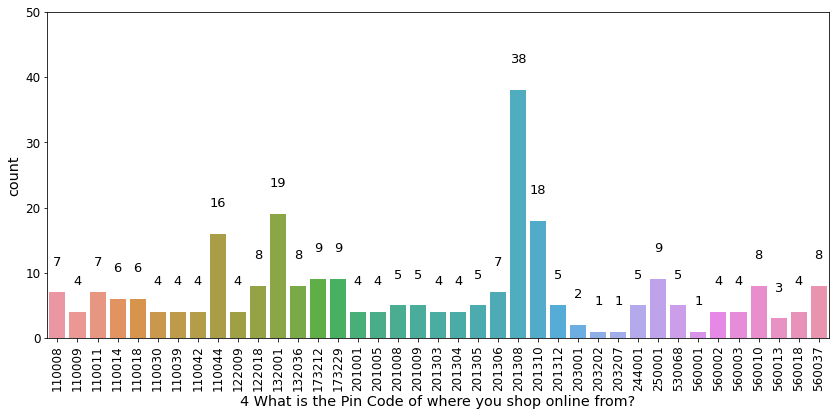

In [328]:
plt.figure(figsize=(14,6))
plt.ylim(0,50)
plt.xticks(rotation=90)
ax=sns.countplot(df['4 What is the Pin Code of where you shop online from?'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+8), ha='center', va='top', color='black', size=13)
plt.show()

- Most number of customers are from areas with pin codes '201308', '132001', '201310', '110030'

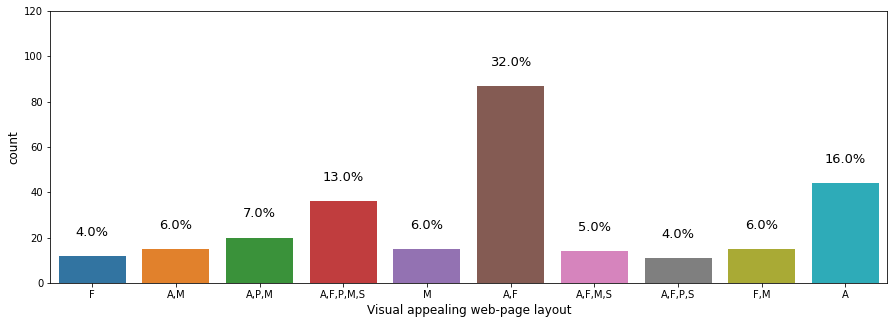

In [37]:
plt.figure(figsize=(15,5))
plt.ylim(0,120)
ax=sns.countplot(df['Visual appealing web-page layout'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+20), ha='center', va='top', color='black', size=13)
plt.show()

- 32% of the customers feel that visual appeal of both Amazon and Flipkart are good.
- 16% customers prefer visual appeal of Amazon's webpage
- 13% feel that all these website are equally visually appealing

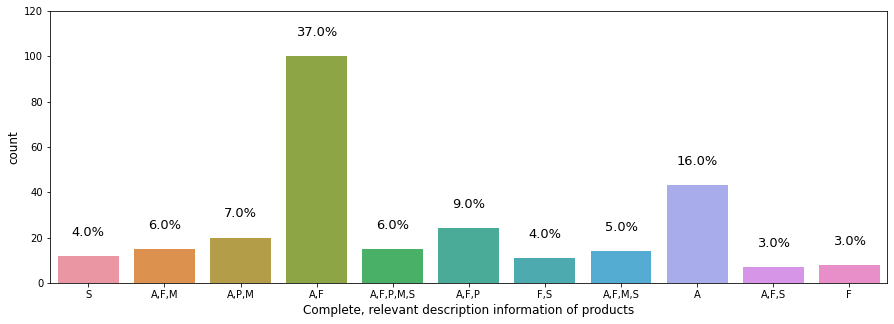

In [38]:
plt.figure(figsize=(15,5))
plt.ylim(0,120)
ax=sns.countplot(df['Complete, relevant description information of products'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+20), ha='center', va='top', color='black', size=13)
plt.show()

- Majority of the customers are happy with the description and information of products provided by Amazon and Flipkart.

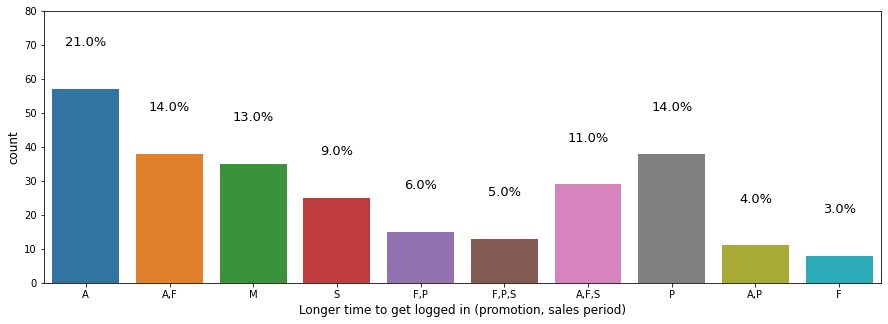

In [39]:
plt.figure(figsize=(15,5))
plt.ylim(0,80)
#plt.xticks(rotation=90)
ax=sns.countplot(df['Longer time to get logged in (promotion, sales period)'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+20), ha='center', va='top', color='black', size=13)
plt.show()

- Customer feel that log in period for Amazon, Flipkart, Myntra and Paytm is too long for their liking

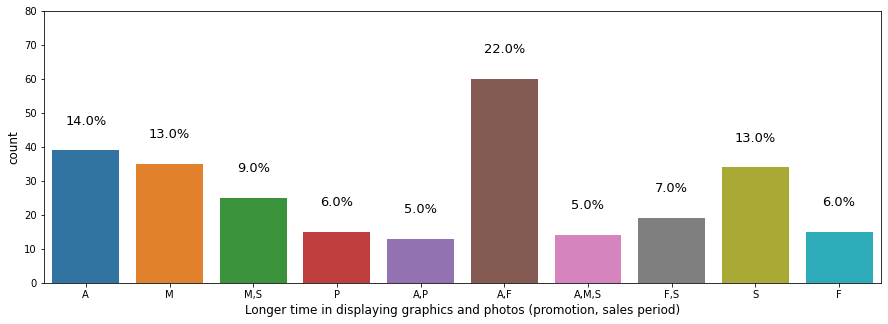

In [40]:
plt.figure(figsize=(15,5))
plt.ylim(0,80)
#plt.xticks(rotation=90)
ax=sns.countplot(df['Longer time in displaying graphics and photos (promotion, sales period)'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+15), ha='center', va='top', color='black', size=13)
plt.show()

- Amazon, Flipkart, Myntra, Snapdeal take longer time to display graphics and photos.
- This may be due to the fact that majority of the customers use mobile internet to browse these sites and mobile internet in India being slow may not be able to load the graphics efficiently.

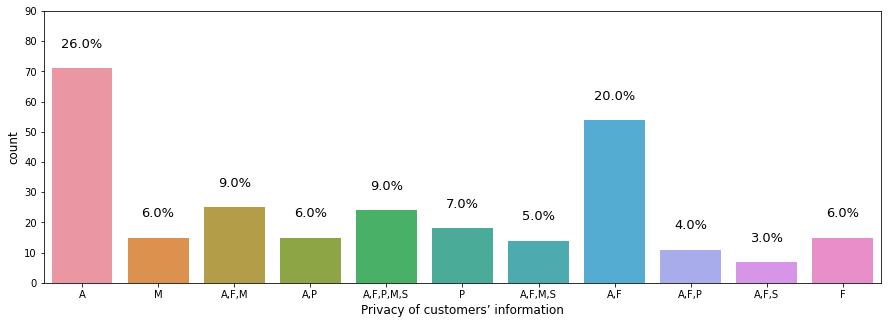

In [41]:
plt.figure(figsize=(15,5))
plt.ylim(0,90)
#plt.xticks(rotation=90)
ax=sns.countplot(df['Privacy of customers’ information'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+15), ha='center', va='top', color='black', size=13)
plt.show()

- Majority of customers trust Amazon and Flipkart with the privacy of their information.

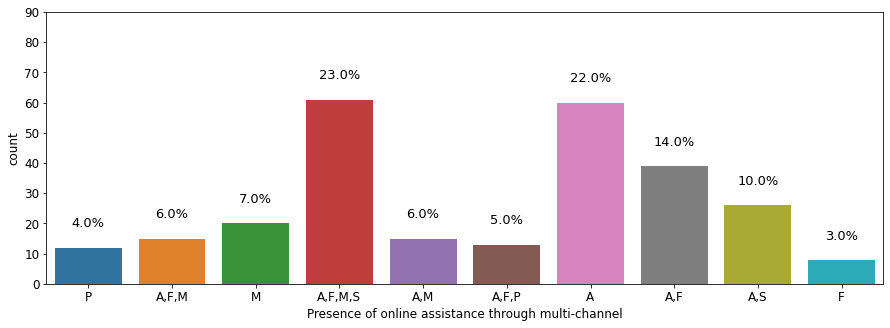

In [42]:
plt.figure(figsize=(15,5))
plt.ylim(0,90)

plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Presence of online assistance through multi-channel'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+15), ha='center', va='top', color='black', size=13)
plt.show()

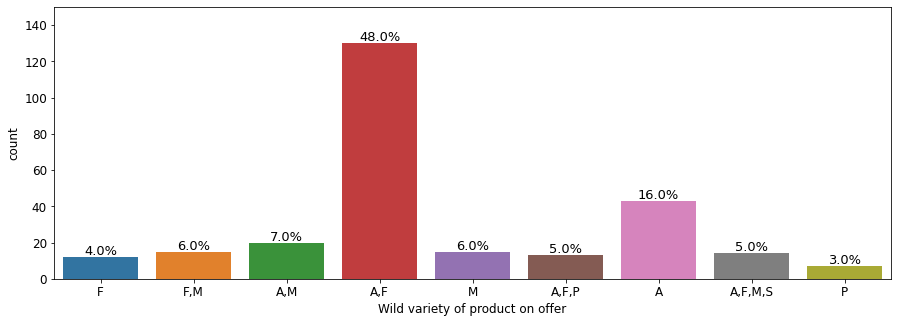

In [43]:
plt.figure(figsize=(15,5))
plt.ylim(0,150)

plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Wild variety of product on offer'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+15), ha='center', va='top', color='black', size=13)
plt.show()

- Majority of customers feel that Amazon and Flipkart both offer wide variety of products.
- Other websites lag behind Amazon and Flipkart interms of product variety on ofer

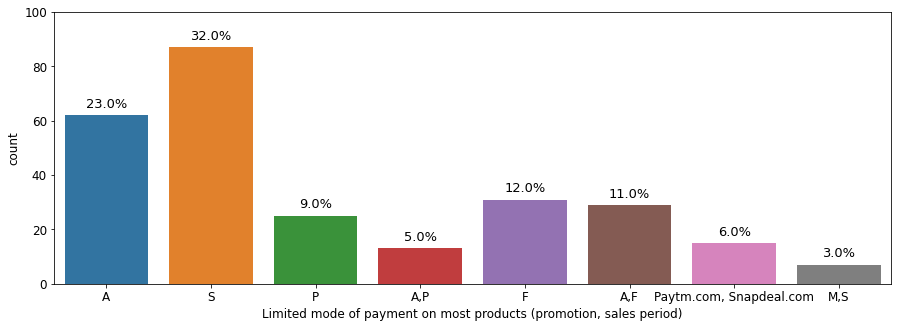

In [44]:
plt.figure(figsize=(15,5))
plt.ylim(0,100)

plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Limited mode of payment on most products (promotion, sales period)'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

- Majority of customers feel that Snapdeal and Amazon offer limited payment modes on majority of products.

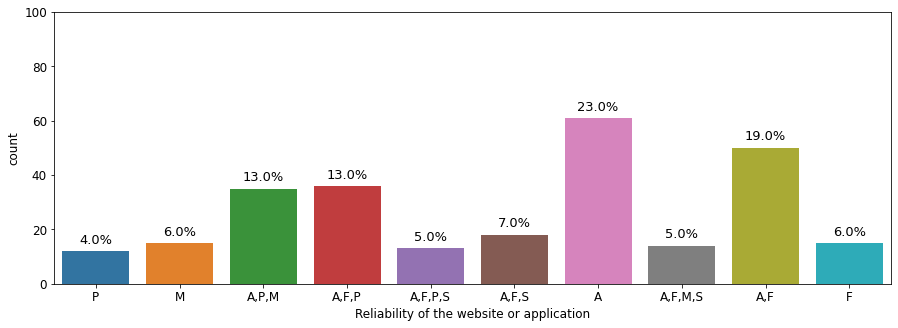

In [45]:
plt.figure(figsize=(15,5))
plt.ylim(0,100)

plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Reliability of the website or application'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

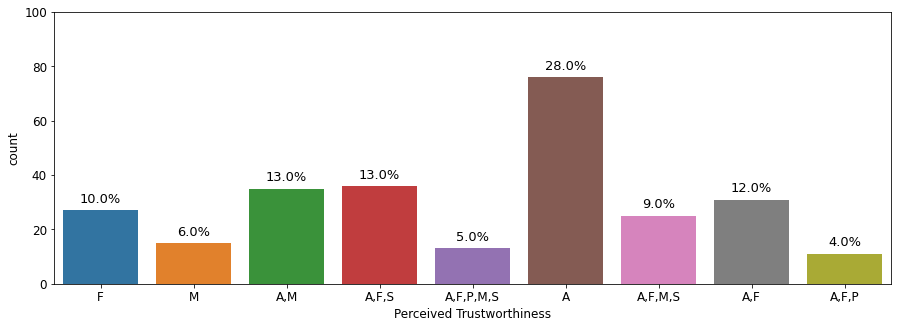

In [46]:
plt.figure(figsize=(15,5))
plt.ylim(0,100)

plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Perceived Trustworthiness'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

- Amazon is considered trustworthy by majority of the customers when compared to other online shopping portals

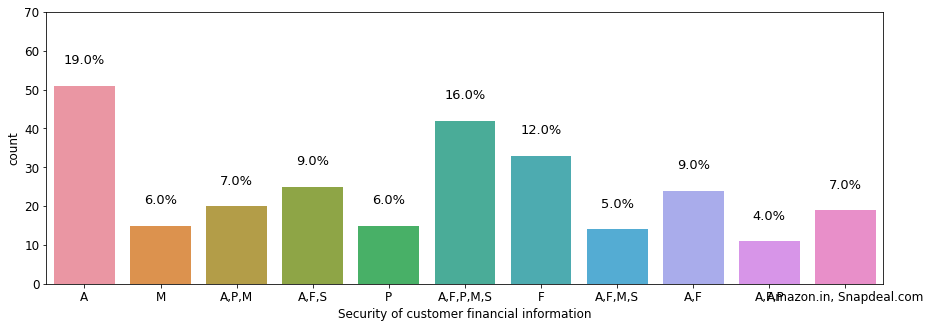

In [47]:
plt.figure(figsize=(15,5))
plt.ylim(0,70)

plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Security of customer financial information'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

- Majority of customers trust Amazon or Flipkart with the security of their financial information.
- However, 16% customers are happy with all the online shopping websites for the security of customer's financial information

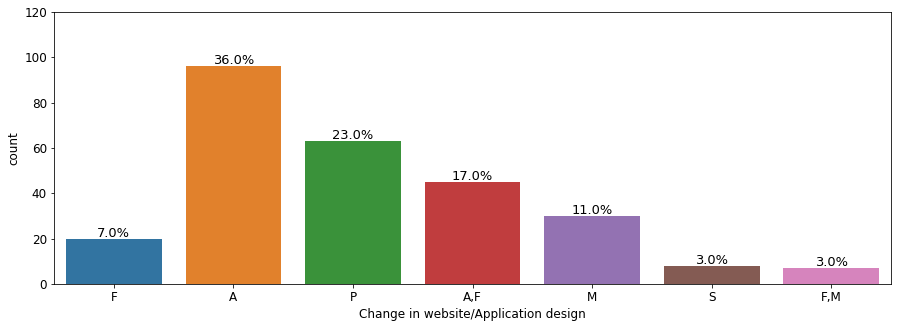

In [48]:
plt.figure(figsize=(15,5))
plt.ylim(0,120)

plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Change in website/Application design'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

- Majority of the customers want change in website/application design of Amazon and Paytm.

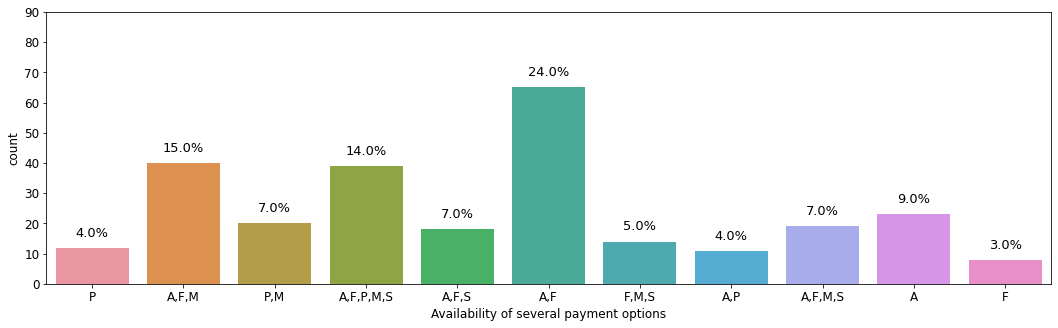

In [49]:
plt.figure(figsize=(18,5))
plt.ylim(0,90)
plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Availability of several payment options'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

- Most of the customers think that 'Amazon' and 'Flipkart' provide several payment options compared to other shopping sites

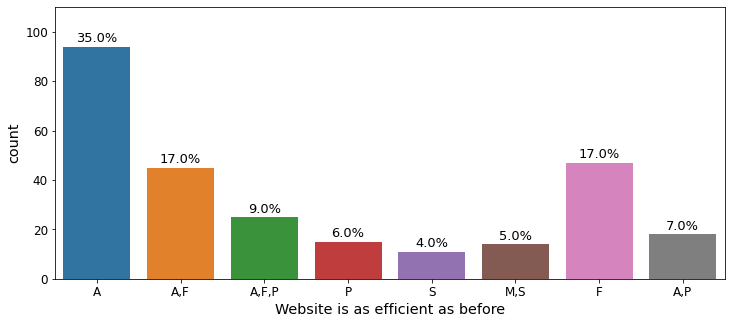

In [369]:
plt.figure(figsize=(12,5))
plt.ylim(0,110)
plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Website is as efficient as before'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

- Majority of the customers think that Amazon website has maintained its efficiency overa period, followed by the Flipkart.
- Less number of customers seems happy with the efficiency of the Paytm, Snapdeal and Myntra wesites

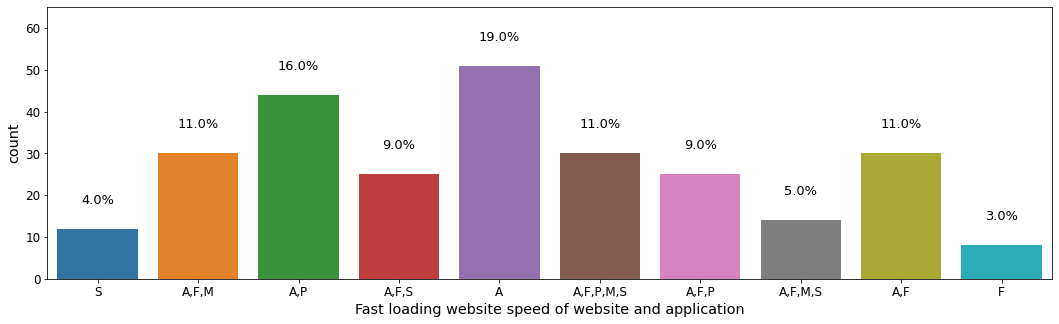

In [371]:
plt.figure(figsize=(18,5))
plt.ylim(0,65)
plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Fast loading website speed of website and application'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

- Amazon along with the Paytm are the fast loading wesites according to the customers.
- Flipkart, Myntra and Snapdeal needs to improve on their website loading speeds

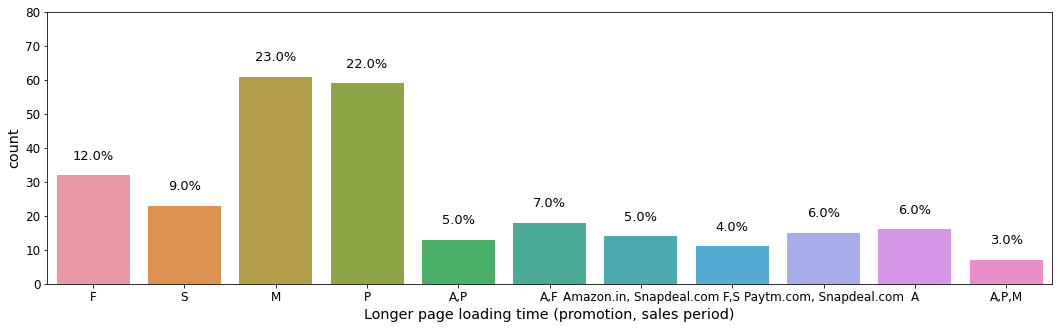

In [377]:
plt.figure(figsize=(18,5))
plt.ylim(0,80)
plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Longer page loading time (promotion, sales period)'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

- Myntra and Paytm seem to have longer page loading time according to mojority of the customers.

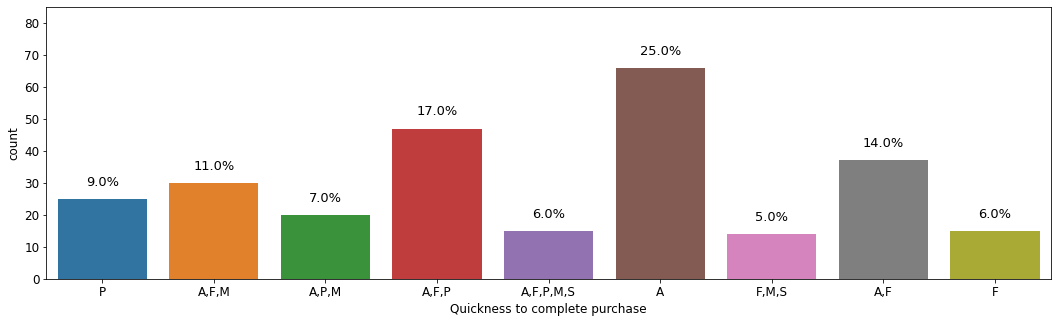

In [56]:
plt.figure(figsize=(18,5))
plt.ylim(0,85)
plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Quickness to complete purchase'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

- According to te majority of customers, Amazon is the quickest when it comes to completing the purchase.

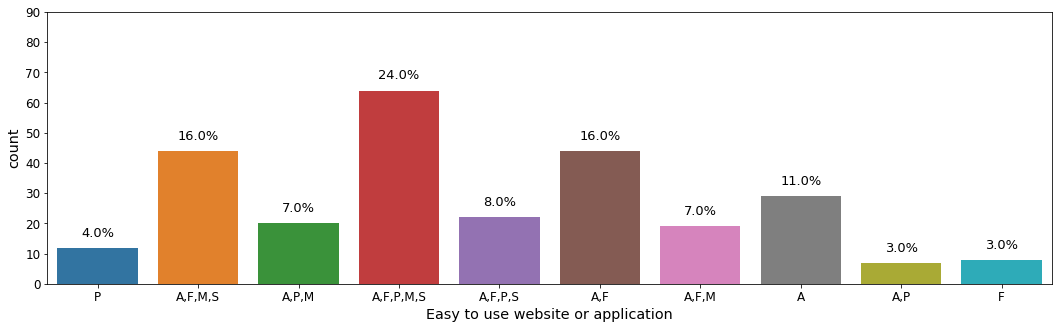

In [379]:
plt.figure(figsize=(18,5))
plt.ylim(0,90)
plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Easy to use website or application'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

- According to the majority of customers, all online shopping websites/application are easy to use.

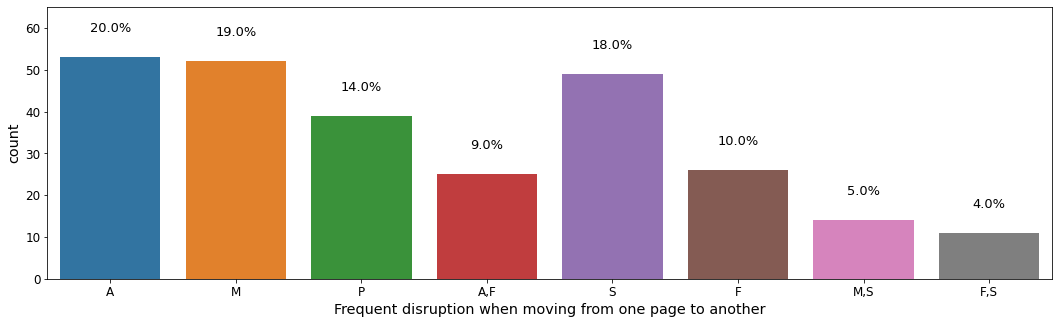

In [380]:
plt.figure(figsize=(18,5))
plt.ylim(0,65)
plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Frequent disruption when moving from one page to another'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

- Most of the customers face frequent disruption while moving from one page to another on Amazon, Myntra and Snapdeal websites

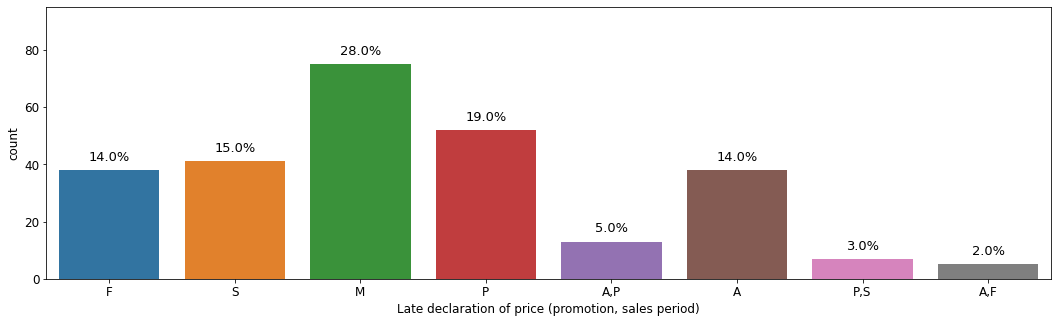

In [60]:
plt.figure(figsize=(18,5))
plt.ylim(0,95)
plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Late declaration of price (promotion, sales period)'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

- most of the customers face late declaration of prices on 'Myntra' and 'Paytm'. 'Flipkart', 'Snapdeal' and 'Amazon' also seem to have same problem.

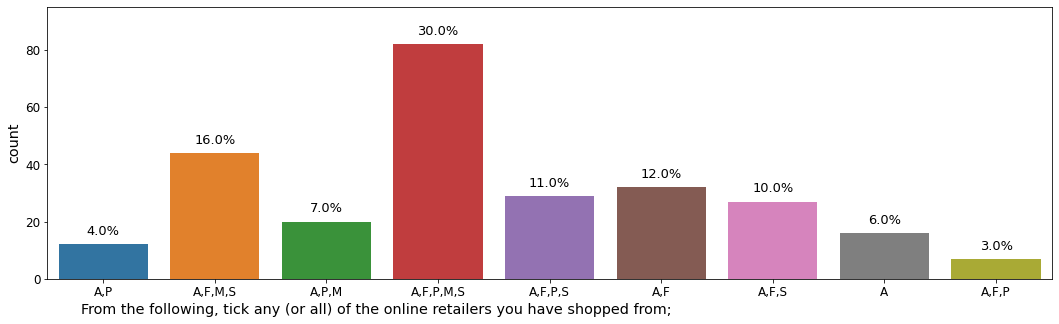

In [385]:
plt.figure(figsize=(18,5))
plt.ylim(0,95)
plt.tick_params(labelsize = 12)
ax=sns.countplot(df['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           '])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

- 30% of the customers have shopped from every online retailers. However, Amazon seems to have best reach among all online retailers.

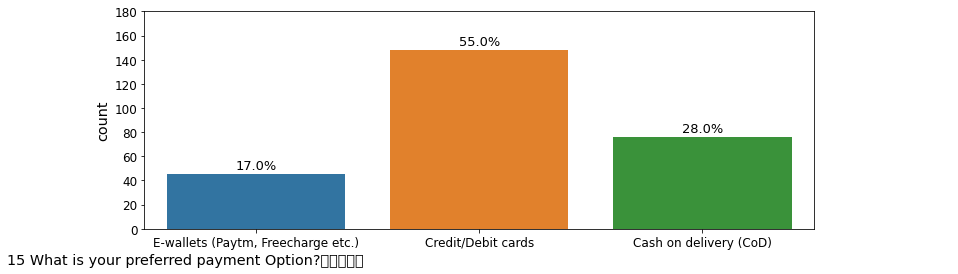

In [396]:
plt.figure(figsize=(12,4))
plt.ylim(0,180)
plt.tick_params(labelsize = 12)
ax=sns.countplot(df['15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               '])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+25), ha='center', va='top', color='black', size=13)
plt.show()

- 'Credit/Debit cards' is the most favoured payment option followed by COD and E-wallets

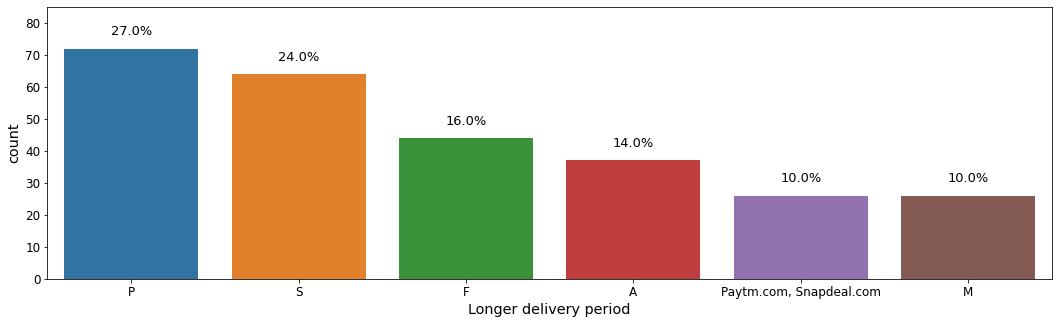

In [398]:
plt.figure(figsize=(18,5))
plt.ylim(0,85)
plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Longer delivery period'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

- 'Paytm' and 'Snapdeal' take longer to deliver the orders according to the majority of the customers.

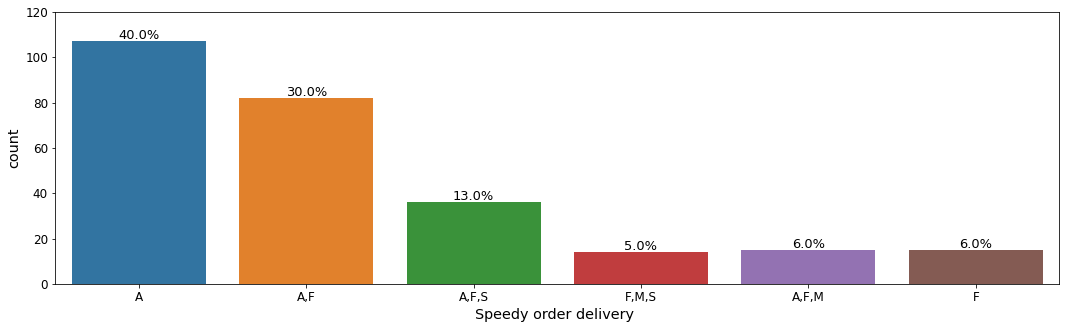

In [402]:
plt.figure(figsize=(18,5))
plt.ylim(0,120)
plt.tick_params(labelsize = 12)
ax=sns.countplot(df['Speedy order delivery '])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

- Majority of the customers feel that the Amazon and Flipkart offer speedy order delivery than the other online retailers.
- 'Paytm' needs to improve on its delivery schedules as no customer has voted them for fast delivery.

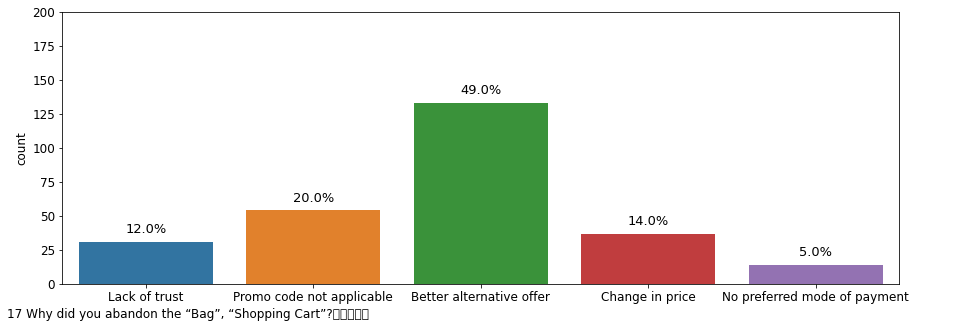

In [91]:
plt.figure(figsize=(15,5))
plt.ylim(0,200)
plt.tick_params(labelsize = 12)
ax=sns.countplot(df['17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       '])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+25), ha='center', va='top', color='black', size=13)
plt.show()

- most of the customers abndon their cart without completing the purchase if they find better alternative offer elsewhere.
- Issues with promocode and changes in prices also make many customers abondon their cart halfway.

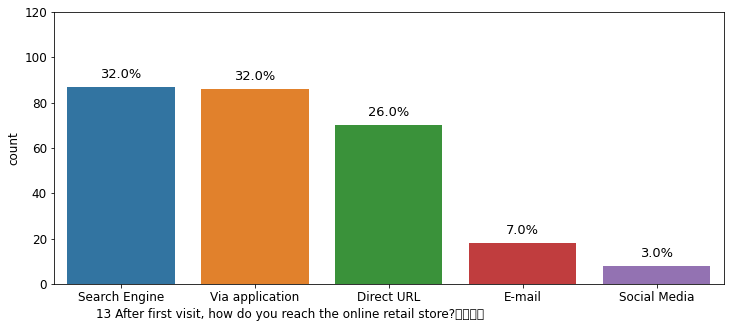

In [88]:
plt.figure(figsize=(12,5))
plt.ylim(0,120)
plt.tick_params(labelsize = 12)
ax=sns.countplot(df['13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   '])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+15), ha='center', va='top', color='black', size=13)
plt.show()

- After their 1st visit, the majority of the customers use either Search Engine, App, or direct URL to reach the desired online store.

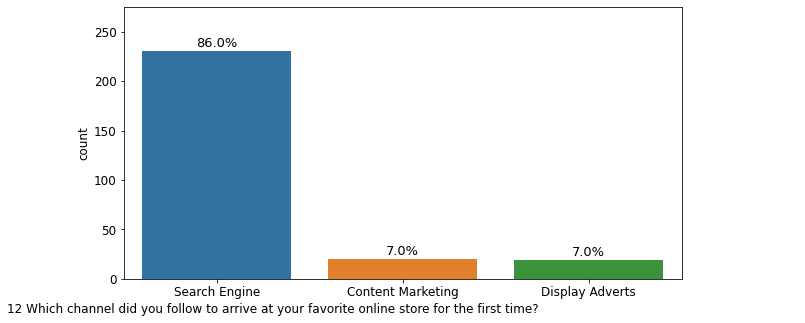

In [87]:
plt.figure(figsize=(10,5))
plt.ylim(0,275)
plt.tick_params(labelsize = 12)
ax=sns.countplot(df['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   '])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+30), ha='center', va='top', color='black', size=13)
plt.show()

- 'Search Engine' seems to be the most common channel used by the customers to find online shops for first times.

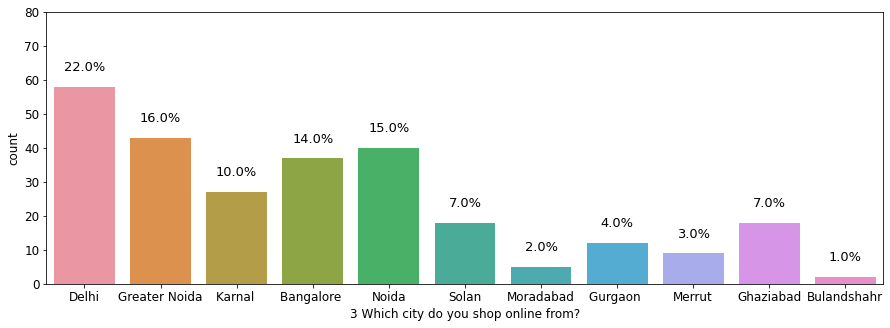

In [99]:
plt.figure(figsize=(15,5))
plt.ylim(0,80)

plt.tick_params(labelsize = 12)
ax=sns.countplot(df['3 Which city do you shop online from?'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=13)
plt.show()

- Most of the online shoppers belong to city areas like Delhi, Greater Noida, Bangalore and Noida

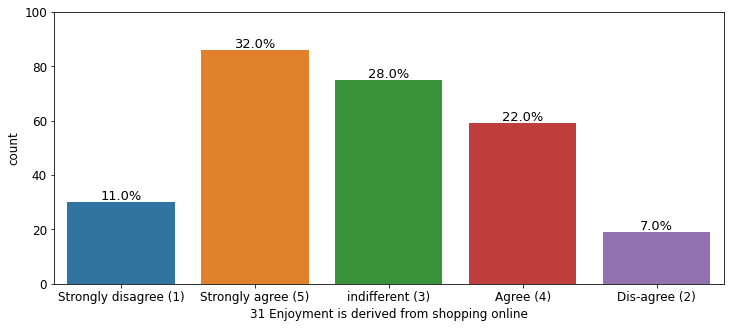

In [101]:
plt.figure(figsize=(12,5))
plt.ylim(0,100)
plt.tick_params(labelsize = 12)
ax=sns.countplot(df['31 Enjoyment is derived from shopping online'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+10), ha='center', va='top', color='black', size=13)
plt.show()

- Large proportion (54%) of the people who do online shopping confess that they get enjoyment out of it.
- 18% of the customers don not find enjoyment in online shopping.

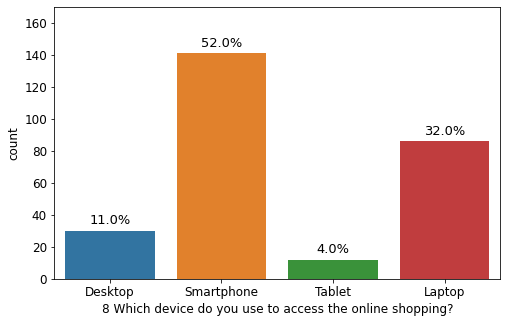

In [144]:
plt.figure(figsize=(8,5))
plt.ylim(0,170)

plt.tick_params(labelsize = 12)
ax=sns.countplot(df['8 Which device do you use to access the online shopping?'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+20), ha='center', va='top', color='black', size=13)
plt.show()

- Smartphone is the most common device used by the customers for online shopping followed by Laptop and Desktop respectively.
- Very few people use Tablet for online shopping.

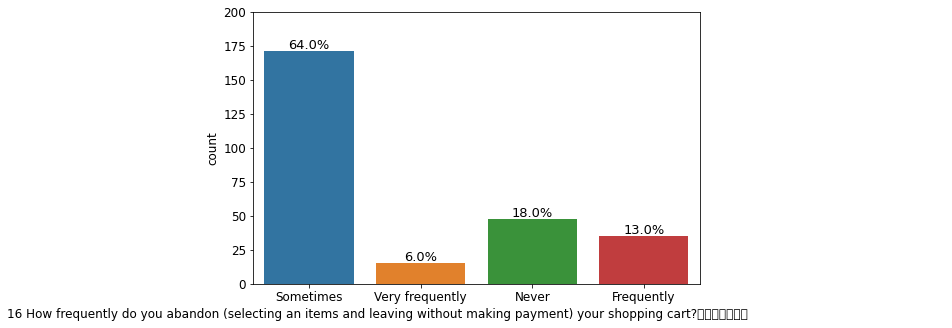

In [146]:
plt.figure(figsize=(8,5))
plt.ylim(0,200)

plt.tick_params(labelsize = 12)
ax=sns.countplot(df['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   '])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+20), ha='center', va='top', color='black', size=13)
plt.show()

- Most of the customers abondon their cart occasionaly. May be when their is a actual genuine reason which drive them to abondon the cart without completing the purchase.

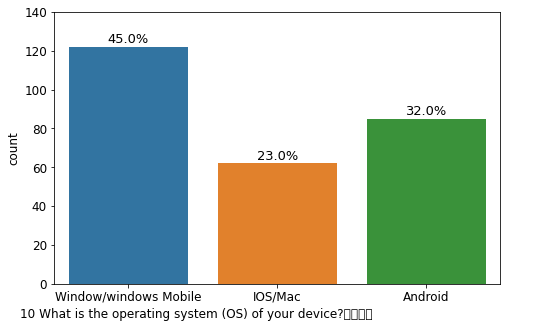

In [150]:
plt.figure(figsize=(8,5))
plt.ylim(0,140)

plt.tick_params(labelsize = 12)
ax=sns.countplot(df['10 What is the operating system (OS) of your device?\t\t\t\t                                          '])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+15), ha='center', va='top', color='black', size=13)
plt.show()

- Majority of the customers use windows operating system followed by Android and IOS respectively

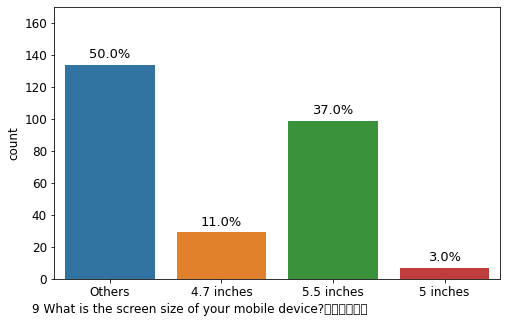

In [151]:
plt.figure(figsize=(8,5))
plt.ylim(0,170)

plt.tick_params(labelsize = 12)
ax=sns.countplot(df['9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        '])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+20), ha='center', va='top', color='black', size=13)
plt.show()

- Majority of customers use large screen mobile devices.

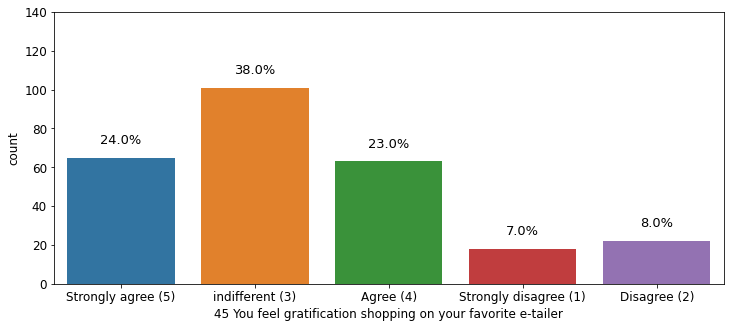

In [154]:
plt.figure(figsize=(12,5))
plt.ylim(0,140)

plt.tick_params(labelsize = 12)
ax=sns.countplot(df['45 You feel gratification shopping on your favorite e-tailer'])
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height()/269*100)}%', (p.get_x()+0.4, p.get_height()+20), ha='center', va='top', color='black', size=13)
plt.show()

- Mojority of people who shop online feel gratification while shopping on their favourite e-retailer.
- However, Large proportion of shoppers have indifferent about this.
- Very few people feel no gratification while shopping on their favourite e-retailer.